# (분류 1) 보험사기 탐지

## 문제
인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 보험사기 탐지 문제를 예로 들어 설명하겠습니다.

보험사기는 매우 크고 중요한 문제입니다. 다양한 사기가 계속 발생하고 있으며, 일부 수법은 일반화되어 있습니다. 따라서 미리 예측하면 많은 피해를 막을 수 있으며, 비용을 절약할 수 있습니다. 이러한 문제에 대하여 AI는 우리를 도울 수 있습니다.

## 데이터
이 실험에서는 [Kaggle](https://www.kaggle.com/buntyshah/auto-insurance-claims-data)에서 얻은 자동차 보험 청구 데이터로 실습할 것입니다. Kaggle은 데이터 전문가들이 모여 지식을 공유하고 서로 경쟁하여 보상을 받을 수 있는 데이터 공유 플랫폼입니다. 정리된 데이터가 Insurance.csv에 포함되어 있습니다.

## 0. 머신러닝 패키지 준비

### 0.1 필요한 패키지 설치

In [1]:
pip install flaml[notebook] --quiet

### 0.2 라이브러리 패키지 불러오기
이 단계는 필요에 따라 적절한 시점까지 미룰 수 있음

In [2]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import flaml

## 1. 데이터집합 로드
Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.Pandas의 read_csv() 함수를 사용하여 CSV(Comma-Separated Values) 형식의 파일을 손쉽게 로드할 수 있습니다.

In [3]:
data = pd.read_csv(r'[Dataset]_Module8_(Insurance).csv').drop(['Unnamed: 0'], axis=1)
data.head()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,53300,0,5,1,2,71610,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,8,1,0,5070,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,35100,0,7,3,3,34650,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,48900,-62400,5,1,2,63400,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,66000,-46000,20,1,1,6500,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
data.shape

(1000, 68)

## 2. 데이터 탐색 (Exploratory Data Analysis, EDA)

In [5]:
# 다양한 feature에 대하여 null 값의 수를 확인
data.isnull().sum()

capital-gains                             0
capital-loss                              0
incident_hour_of_the_day                  0
number_of_vehicles_involved               0
witnesses                                 0
                                         ..
policy_annual_premium_groups_high         0
policy_annual_premium_groups_low          0
policy_annual_premium_groups_medium       0
policy_annual_premium_groups_very high    0
policy_annual_premium_groups_very low     0
Length: 68, dtype: int64

In [6]:
# 데이터집합에 대한 추가 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   capital-gains                           1000 non-null   int64
 1   capital-loss                            1000 non-null   int64
 2   incident_hour_of_the_day                1000 non-null   int64
 3   number_of_vehicles_involved             1000 non-null   int64
 4   witnesses                               1000 non-null   int64
 5   total_claim_amount                      1000 non-null   int64
 6   fraud_reported                          1000 non-null   int64
 7   insured_sex_FEMALE                      1000 non-null   int64
 8   insured_sex_MALE                        1000 non-null   int64
 9   insured_occupation_adm-clerical         1000 non-null   int64
 10  insured_occupation_armed-forces         1000 non-null   int64
 11  insured_occupation

In [7]:
# 데이터집합의 통계적 특성 조회
data.describe()

,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,insured_occupation_adm-clerical,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.0000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,0.247000,0.537000,0.463000,0.065000,...,0.080000,0.043000,0.04200,0.047000,0.1020,0.153000,0.151000,0.69300,0.001000,0.002000
std,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,0.431483,0.498879,0.498879,0.246649,...,0.271429,0.202959,0.20069,0.211745,0.3028,0.360168,0.358228,0.46148,0.031623,0.044699
min,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0000,0.000000,0.000000,1.00000,0.000000,0.000000
max,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.0000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# 목표 열인 fraud_reported의 고유값 확인
data['fraud_reported'].unique()

array([1, 0])

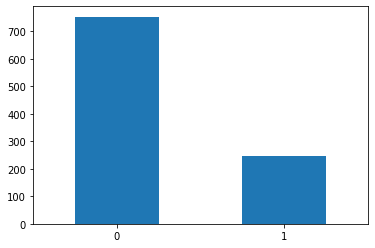

In [9]:
# fraud_reported 열의 0과 1의 분포 확인
data['fraud_reported'].value_counts().plot.bar(rot=0)

## 3. 데이터 준비와 분할

In [10]:
# feature와 label로 구분
X = data.drop(['fraud_reported'], axis=1)
y = data.fraud_reported

In [11]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, random_state=1)

## 4. 분류기 모델 생성

In [12]:
# AutoML 도구인 FLAML을 사용하여 최적 모델 자동 판별
aml1 = flaml.AutoML()
aml1.fit(X_train, y_train, task="classification")

[flaml.automl: 07-29 14:05:27] {2427} INFO - task = classification
[flaml.automl: 07-29 14:05:27] {2429} INFO - Data split method: stratified
[flaml.automl: 07-29 14:05:27] {2432} INFO - Evaluation method: holdout
[flaml.automl: 07-29 14:05:27] {2551} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 07-29 14:05:27] {2600} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl: 07-29 14:05:27] {160} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 07-29 14:05:27] {160} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 07-29 14:05:27] {160} WARNING - Starting points outside of the search space are removed. Remaining starting points: []
[flaml.automl: 07-29 14:05:27] {160} WARNING - Starting p

## 5. 평가

머신러닝 알고리즘의 정확도는 알고리즘이 얼마나 잘 수행되고 있는지, 즉 알고리즘이 데이터 포인트를 올바르게 분류하는 빈도를 측정하는 것입니다. 정확도는 다음과 같이 주어집니다:
![정확도](https://miro.medium.com/max/1050/1*O5eXoV-SePhZ30AbCikXHw.png)
정밀도는 관련성 있는 결과의 %를 의미하고, 재현율은 알고리즘에 의해 올바르게 분류된 전체 관련 결과의 %를 의미합니다.
![Precision and Recall](https://miro.medium.com/max/1050/1*pOtBHai4jFd-ujaNXPilRg.png)
True positive: 모델이 긍정 클래스를 올바르게 예측합니다.<br>
True negative: 모델이 부정 클래스를 올바르게 예측합니다.<br>
False positiv: 모델이 긍정 클래스를 잘못 예측합니다.<br>
False negative: 모델이 부정 클래스를 잘못 예측합니다

In [13]:
y_pred = aml1.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       180
           1       0.90      0.27      0.42        70

    accuracy                           0.79       250
   macro avg       0.84      0.63      0.64       250
weighted avg       0.81      0.79      0.74       250



In [15]:
# 판별된 최적 알고리듬과 하이퍼매개변수
aml1.best_estimator, aml1.best_config

('extra_tree',
 {'criterion': 'entropy',
  'max_features': 0.12216944435630522,
  'max_leaves': 4,
  'n_estimators': 4})

## 6. 더 좋은 모델 찾기

In [16]:
# 더 많은 시간을 투입하여 성능이 더 좋은 모델 탐색 시도
aml2 = flaml.AutoML()
aml2.fit(X_train, y_train, task="classification", time_budget=60, verbose=False)

y_pred = aml2.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       180
           1       0.69      0.73      0.71        70

    accuracy                           0.83       250
   macro avg       0.79      0.80      0.80       250
weighted avg       0.84      0.83      0.83       250



In [17]:
aml2.best_estimator, aml2.best_config

('xgb_limitdepth',
 {'colsample_bylevel': 0.847756342161632,
  'colsample_bytree': 0.8668431975640492,
  'learning_rate': 0.05999296193433197,
  'max_depth': 7,
  'min_child_weight': 3.750118053002884,
  'n_estimators': 23,
  'reg_alpha': 0.0015245843735931766,
  'reg_lambda': 0.14019979280744393,
  'subsample': 0.8895588746662894})

## 결론

인공 지능은 다양한 현대 사회의 문제를 해결하는데 널리 사용되고 있습니다. 분류는 인공지능에서 다루는 대표적인 지도학습 문제 유형입니다. 이 실험에서는 분류 문제의 사례인 보험사기 탐지에 인공 지능을 사용하는 방법의 
예를 보았습니다. 같은 목적으로 다른 모델을 사용할 수도 있습니다.